In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
plt.rc('axes',titlesize='xx-large')
plt.rc('axes',labelsize='x-large')
plt.rc('legend',fontsize='x-large')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

# An introduction to neural networks with Keras
Dr. Florent Martin (Universität Regensburg)  
March 2018

**Neural networks are models used in machine learning.**

**Machine learning**:  Models which learn to solve a problem using many instances of this problem with the solution.  

**Keras**: Python Library for Neural networks

1. Logistic regression
  1. Iris Dataset
  3. Logistic regression with scikit-learn
  4. Logistic regression with Keras
1. Gradient descent 
  1. Optimization
  2. Loss function
1. Neural networks
  1. Versicolor
  2. Logistic regression again
  3. Real neural networks

![comparison table](../reports/figures/table1.png)

<img style="height:600px;margin: -5px 0px 0px 100px" src="../reports/figures/table1.png">

<img src="../reports/figures/comparaison_table.png" alt="Drawing" style="width: 2000px;"/>

![comparison table](../reports/figures/05-table-log_reg-nn.png)

<img style="width:2000px;height:2000px;margin: -300px 1px -1px 10px" src="../reports/figures/05-table-log_reg-nn.png">

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# (Section 1) Before neural networks: Logistic regression

# 1.1 The iris dataset

In [15]:
iris = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


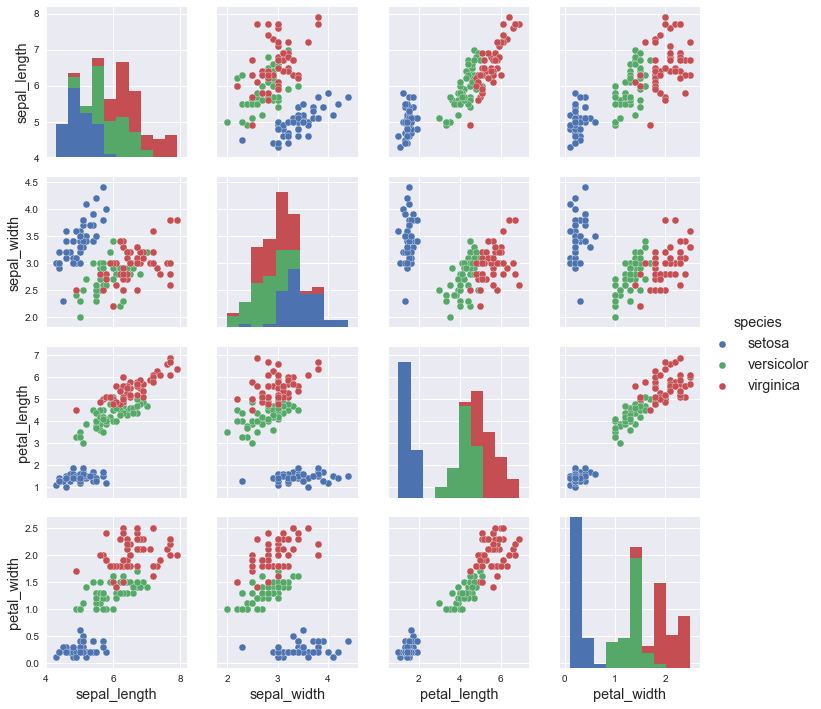

In [16]:
sns.pairplot(iris, hue="species");

### Goal: knowing the petal width, predict if the iris is a virginica

# 1.2 Logistic regression

In [17]:
iris['isVirginica'] = (iris['species'] == 'virginica').astype(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
92,5.8,2.6,4.0,1.2,versicolor,0
141,6.9,3.1,5.1,2.3,virginica,1
130,7.4,2.8,6.1,1.9,virginica,1
119,6.0,2.2,5.0,1.5,virginica,1
48,5.3,3.7,1.5,0.2,setosa,0


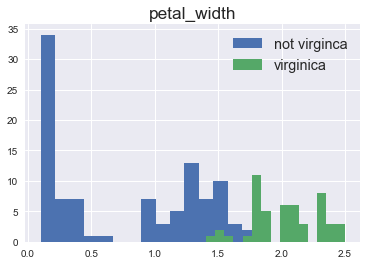

In [19]:
fig, ax = plt.subplots()
iris.groupby('isVirginica').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not virginca', 'virginica']);

<font size=4>
The **logistic regression** algorithm searches for a function 
$$ P: [0,3] \to [0,1]$$
If $x = $ petal width, $P(x)$ is an estimate (= a guess) of the probability that the plant is a virginica.  
</font>
* P(x)>0.5 answer yes (the plant is a virginica)
* P(x)$\leq$ 0.5 answer no 

<font size=4>
The idea of logistic regression is to look for a function depending on paramters $W$ and $B$:  
<br>
$$P_{W,B}(x) = \sigma(Wx+B)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$
    
$$ \sigma : x \mapsto  \frac{1}{1+e^{-x}}$$
    
We call $W$ the **weight** and $B$  the **bias**.
</font>

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

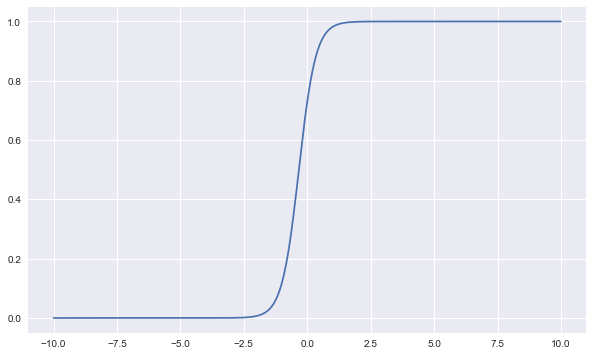

In [24]:
plt.figure(figsize=(10, 6))
x = np.arange(-10, 10, .01)
# modify live the values of w and b
w, b = 3, 1
plt.plot(x, sigmoid(w*x+b));

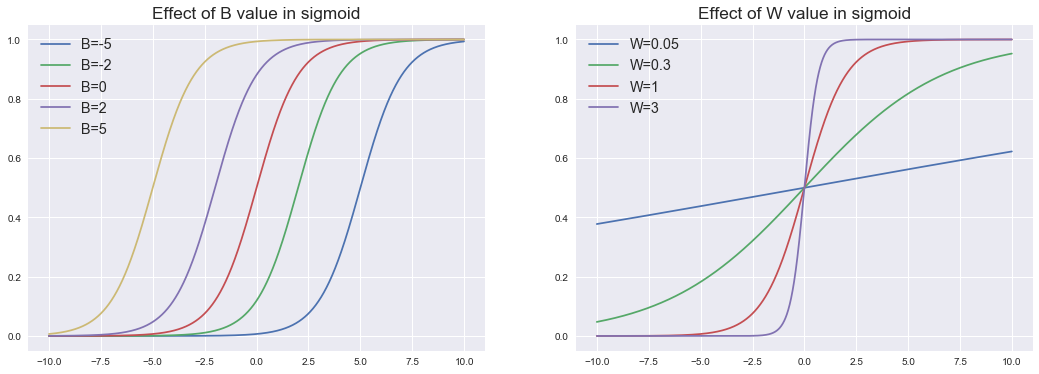

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
ax1.set_title('Effect of B value in sigmoid')
for b in [-5, -2, 0, 2, 5]:
    ax1.plot(x, sigmoid(x + b),label='B={}'.format(b))
    ax1.legend()
ax2.set_title('Effect of W value in sigmoid')
for w in [0.05, 0.3, 1, 3]:
    ax2.plot(x, sigmoid(w*x),label='W={}'.format(w))
    ax2.legend()

## 1.3 Logistic Regression with Scikit-learn

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
np.set_printoptions(suppress=True, precision=2)

In [26]:
model.fit(iris[['petal_width']], iris['isVirginica'])
model.coef_ , model.intercept_

(array([[ 2.62]]), array([-4.22]))

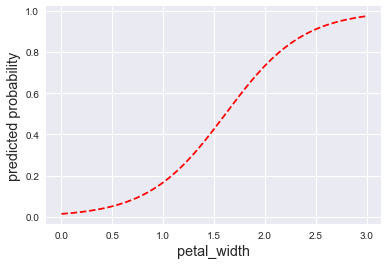

In [27]:
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths, predicted_proba, 'r--')
plt.xlabel('petal_width')
plt.ylabel('predicted probability');

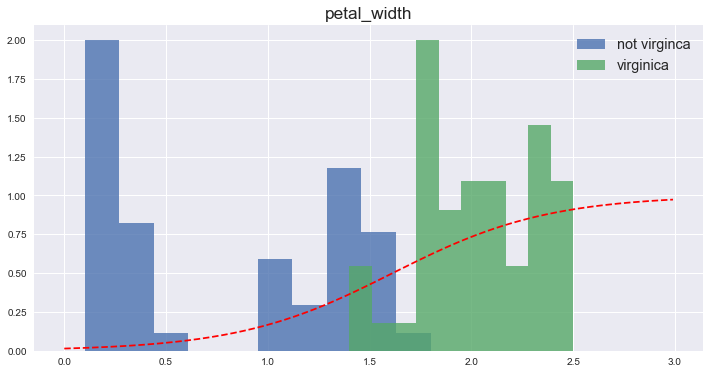

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax, alpha=.8);
plt.legend(['not virginca', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--');

### How to evaluate the model?  

<font size=5>
$$ \textbf{Accuracy} = \frac{\text{number of samples correctly classified}}{\text{total number of samples}}$$
<size>

In [29]:
model.score(iris[['petal_width']], iris[['isVirginica']])

0.95999999999999996

### Graphical representation of logistic regression
Choose the parameters:

* W (the weight)
* B (the bias)

![logistic regression](../reports/figures/01-log.png)

This is a (very) simple example of a neural network

# 1.4 Keras

In [73]:
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

In [31]:
model = Sequential([
    Dense(1, input_dim=1), # for the map x -> W*x + B
    Activation('sigmoid') # for the sigmoid function
])
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [38]:
model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=500, verbose=False);
model.get_weights()

[array([[ 3.67]], dtype=float32), array([-5.96], dtype=float32)]

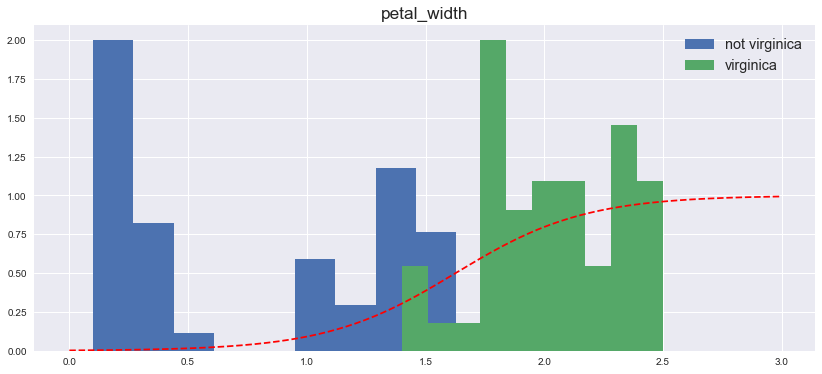

In [39]:
fig, ax = plt.subplots(figsize=(14,6))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not virginica', 'virginica'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--')

# (Section 2) Gradient descent

## How does this work? 

# 2.1 Optimization, gradient descent with Keras

In [40]:
model = Sequential([
    Dense(1,input_dim=1, kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'), 
])

In [41]:
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
x_grid, y_grid = np.mgrid[-10:10:.1,-10:10:.1]

In [43]:
def get_accuracy(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy= model.evaluate(iris[['petal_width']], \
                              iris[['isVirginica']],verbose=0)[1]
    return accuracy

In [44]:
vaccuracy = np.vectorize(get_accuracy)

In [ ]:
#takes two minutes to run
acc_grid = vaccuracy(x_grid,y_grid)

In [45]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

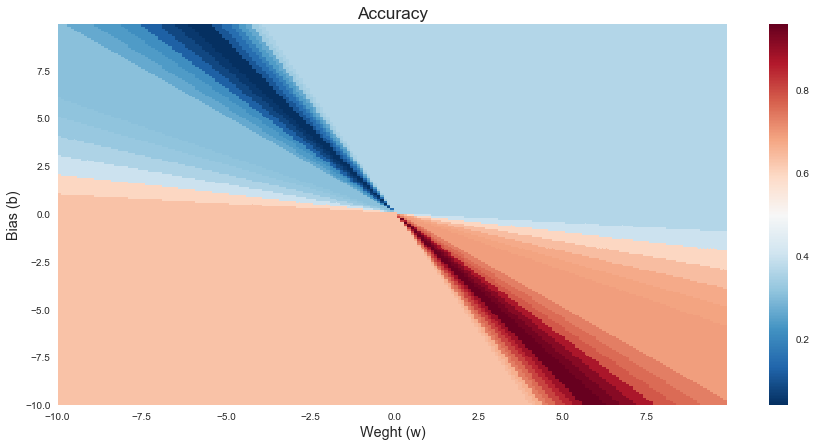

In [55]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid , y_grid , acc_grid , cmap='RdBu_r')
plt.colorbar()
ax_acc.set(title='Accuracy', xlabel='Weght (w)', ylabel='Bias (b)');

## Problem: the accuracy is constant on huge zones

# 2.2 The cross entropy  loss function

<font size=6>
Fix the weigth $W$ and bias $B$. 
<br><br><br>
$$\mathcal{L}(p,y) := y \log(p) + (1-y)\log(1-p)$$
 <br>
$$\text{Loss} :=\sum_{i=1}^n \mathcal{L}(p_i,y_i) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
<br>
where </font>

*  <font size=4>$y_i\in \{0,1\}$ is the class of the i-th sample</font>

*  <font size=4>$p_i \in [0,1]$ is the predicted probability $P_{w,b}(x_i)$ calculated by the logistic regression model for parameter values $w$ and $b$</font>

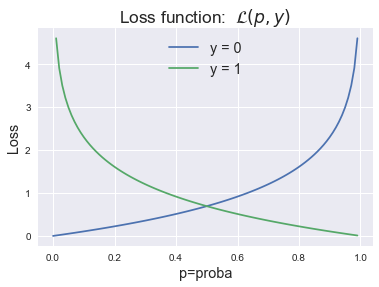

In [47]:
probas = np.arange(0,1,.01)
loss0 = -np.log(1-probas)
loss1 = - np.log(probas)
plt.plot(probas,loss0,label='y = 0')
plt.plot(probas,loss1,label='y = 1')
plt.xlabel('p=proba')
plt.ylabel('Loss')
plt.title('Loss function:  $\mathcal{L}(p,y)$')
plt.legend();

In [48]:
def get_loss(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(iris[['petal_width']], iris[['isVirginica']], \
                          verbose=0)[0]
    return loss
vloss = np.vectorize(get_loss)

In [49]:
loss_grid = vloss(x_grid,y_grid) 

KeyboardInterrupt: 

In [50]:
import pickle
with open('../data/loss_grid', 'rb') as f:
    loss_grid =pickle.load(f)

In [63]:
model.layers[0].set_weights( [ np.array([[9]]) , np.array([9]) ] ) 

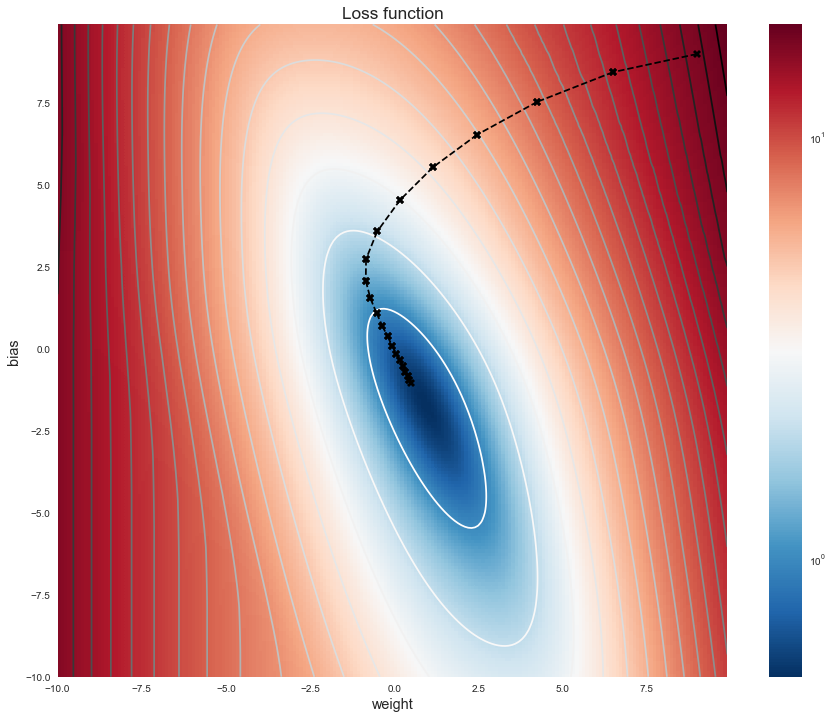

In [64]:
fig , ax_loss = plt.subplots(figsize=(15,12))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
contour = plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function'); plt.xlabel('weight'); plt.ylabel('bias');
for i in range(20):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=30, verbose=0)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

# (Section 3) Neural Networks: when linear methods are not sufficient

# 3.1 Versicolor

In [66]:
iris['isVersicolor'] = (iris['species'] == 'versicolor').apply(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica,isVersicolor
111,6.4,2.7,5.3,1.9,virginica,1,0
52,6.9,3.1,4.9,1.5,versicolor,0,1
130,7.4,2.8,6.1,1.9,virginica,1,0
13,4.3,3.0,1.1,0.1,setosa,0,0
30,4.8,3.1,1.6,0.2,setosa,0,0


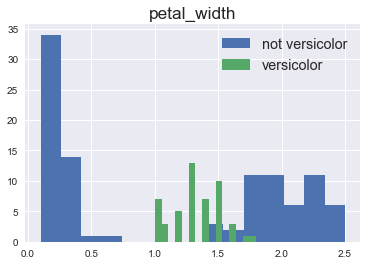

In [67]:
fig, ax = plt.subplots()
iris.groupby('isVersicolor').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not versicolor', 'versicolor']);

## Goal: determine if an iris is a versicolor knowing its petal width

# 3.2 Let's try  logistic regression

In [68]:
model = Sequential([
    Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'),
])

In [69]:
model.compile(optimizer=optimizers.SGD(lr=0.05), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
model.fit(iris[['petal_width']], iris[['isVersicolor']], epochs=500)

Epoch 1/500
150/150 [==============================] - 0s 506us/step - loss: 0.9531 - acc: 0.6667
Epoch 2/500
150/150 [==============================] - 0s 54us/step - loss: 0.8875 - acc: 0.6667
Epoch 3/500
150/150 [==============================] - 0s 55us/step - loss: 0.8382 - acc: 0.6667
Epoch 4/500
150/150 [==============================] - 0s 65us/step - loss: 0.7984 - acc: 0.6667
Epoch 5/500
150/150 [==============================] - 0s 63us/step - loss: 0.7692 - acc: 0.6400
Epoch 6/500
150/150 [==============================] - 0s 55us/step - loss: 0.7476 - acc: 0.6333
Epoch 7/500
150/150 [==============================] - 0s 64us/step - loss: 0.7305 - acc: 0.6333
Epoch 8/500
150/150 [==============================] - 0s 57us/step - loss: 0.7180 - acc: 0.6333
Epoch 9/500
150/150 [==============================] - 0s 57us/step - loss: 0.7082 - acc: 0.6333
Epoch 10/500
150/150 [==============================] - 0s 66us/step - loss: 0.7008 - acc: 0.6333
Epoch 11/500
150/150 [======

150/150 [==============================] - 0s 57us/step - loss: 0.6343 - acc: 0.6667
Epoch 166/500
150/150 [==============================] - 0s 53us/step - loss: 0.6342 - acc: 0.6667
Epoch 167/500
150/150 [==============================] - 0s 57us/step - loss: 0.6342 - acc: 0.6667
Epoch 168/500
150/150 [==============================] - 0s 53us/step - loss: 0.6339 - acc: 0.6667
Epoch 169/500
150/150 [==============================] - 0s 79us/step - loss: 0.6340 - acc: 0.6667
Epoch 170/500
150/150 [==============================] - 0s 69us/step - loss: 0.6346 - acc: 0.6667
Epoch 171/500
150/150 [==============================] - 0s 57us/step - loss: 0.6342 - acc: 0.6667
Epoch 172/500
150/150 [==============================] - 0s 72us/step - loss: 0.6344 - acc: 0.6667
Epoch 173/500
150/150 [==============================] - 0s 75us/step - loss: 0.6347 - acc: 0.6667
Epoch 174/500
150/150 [==============================] - 0s 56us/step - loss: 0.6342 - acc: 0.6667
Epoch 175/500
150/150 [=

150/150 [==============================] - 0s 67us/step - loss: 0.6340 - acc: 0.6667
Epoch 330/500
150/150 [==============================] - 0s 60us/step - loss: 0.6349 - acc: 0.6667
Epoch 331/500
150/150 [==============================] - 0s 65us/step - loss: 0.6342 - acc: 0.6667
Epoch 332/500
150/150 [==============================] - 0s 58us/step - loss: 0.6345 - acc: 0.6667
Epoch 333/500
150/150 [==============================] - 0s 54us/step - loss: 0.6340 - acc: 0.6667
Epoch 334/500
150/150 [==============================] - 0s 67us/step - loss: 0.6341 - acc: 0.6667
Epoch 335/500
150/150 [==============================] - 0s 61us/step - loss: 0.6349 - acc: 0.6667
Epoch 336/500
150/150 [==============================] - 0s 77us/step - loss: 0.6343 - acc: 0.6667
Epoch 337/500
150/150 [==============================] - 0s 64us/step - loss: 0.6340 - acc: 0.6667
Epoch 338/500
150/150 [==============================] - 0s 65us/step - loss: 0.6350 - acc: 0.6667
Epoch 339/500
150/150 [=

150/150 [==============================] - 0s 63us/step - loss: 0.6339 - acc: 0.6667
Epoch 412/500
150/150 [==============================] - 0s 63us/step - loss: 0.6341 - acc: 0.6667
Epoch 413/500
150/150 [==============================] - 0s 61us/step - loss: 0.6343 - acc: 0.6667
Epoch 414/500
150/150 [==============================] - 0s 61us/step - loss: 0.6342 - acc: 0.6667
Epoch 415/500
150/150 [==============================] - 0s 61us/step - loss: 0.6340 - acc: 0.6667
Epoch 416/500
150/150 [==============================] - 0s 64us/step - loss: 0.6348 - acc: 0.6667
Epoch 417/500
150/150 [==============================] - 0s 57us/step - loss: 0.6345 - acc: 0.6667
Epoch 418/500
150/150 [==============================] - 0s 55us/step - loss: 0.6341 - acc: 0.6667
Epoch 419/500
150/150 [==============================] - 0s 68us/step - loss: 0.6341 - acc: 0.6667
Epoch 420/500
150/150 [==============================] - 0s 58us/step - loss: 0.6343 - acc: 0.6667
Epoch 421/500
150/150 [=

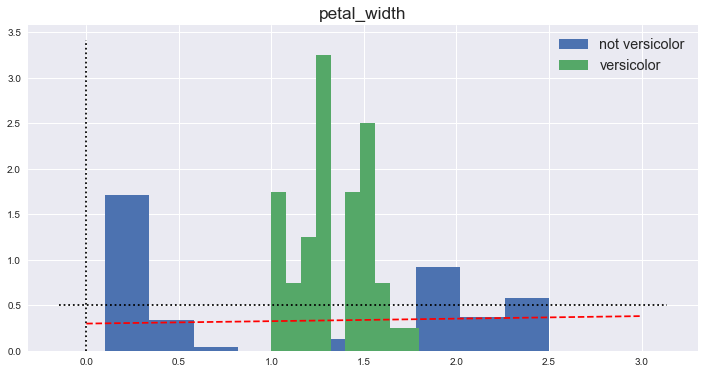

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted');

## BAD NEWS: PREDICTED PROBABILITIES BY LOGISTIC REGRESSION CAN NOT UP AND DOWN

# 3.3 Real neural networks

In [77]:
model = Sequential()
model.add(Dense(3, input_dim=1 ))
model.add(Activation('sigmoid'))
model.add(Dense(1, input_dim=1 ) )
model.add(Activation('sigmoid'))
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy')

![NN](../reports/figures/02-hidden.png)

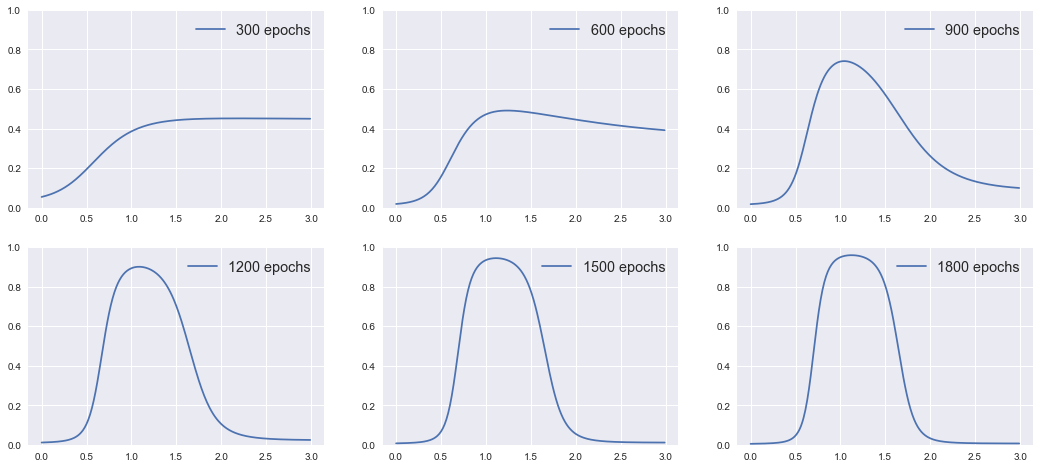

In [78]:
plt.subplots(nrows=3,ncols=3,figsize=(18,8),sharex=True,sharey=True)
for i in range(1,7):
    plt.subplot(2,3, i)
    model.fit(iris[['petal_width']], iris[['isVersicolor']],epochs=300,verbose=0)
    probas = model.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='{} epochs'.format(i*300))
    plt.ylim((0,1))
    plt.legend()

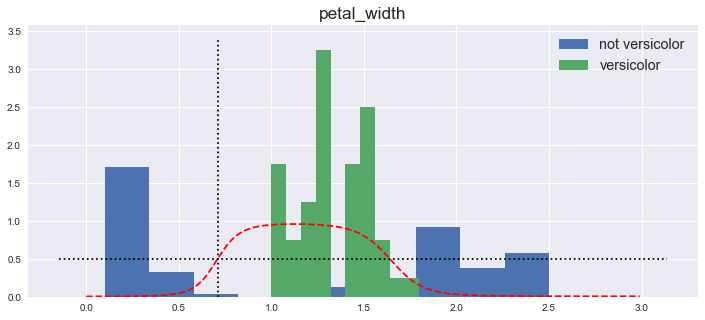

In [79]:
fig, ax = plt.subplots(figsize=(12,5))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted');